<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
from spacy.tokenizer import Tokenizer

## 1) *Optional:* Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [2]:
# from bs4 import BeautifulSoup
# import requests

## 2) Use Spacy to tokenize / clean the listings 

In [3]:
nlp = spacy.load("en_core_web_lg")

In [4]:
path = %pwd
path

'/Users/curtismckendrick/lambda school repositories/Class Notes/Unit-4-New/DS-Unit-4-Sprint-1-NLP/module2-vector-representations'

In [64]:
# make all the words lower case and remove special characters

import re
df = pd.read_csv(path + "/data/job_listings.csv")
df['description'] = df['description'].apply(lambda x: x.lower())
df['description'] = df['description'].apply(lambda x: re.sub(r'[^a-zA-Z ^0-9]', '', x))

In [65]:
# remove stop words and any lingering unwanted white space

tokenizer = Tokenizer(nlp.vocab)

# expand stop words
STOPS = nlp.Defaults.stop_words.union(['', ' ', '  ', '   ', '    ', 
                                       'datum', 'science', 'scientist', 'data',
                                      ])

# Now we get to work on getting rid of stop words
def remove_stops(df_column):
    """ takes a column of strings and converts the strings into lists of tokens """
    
    tokens = []
    for doc in tokenizer.pipe(df_column, batch_size=500):
        
        doc_tokens = []
        for token in doc:
            if (token.lemma_ not in STOPS) and (token.is_punct == False):
                doc_tokens.append(token.lemma_)
        tokens.append(doc_tokens)

    return tokens

In [66]:
df['description'] = remove_stops(df['description'])
df.head()

,Unnamed: 0,description,title
0,0,"[bdivdivjob, requirementsdivullipnconceptual, ...",Data scientist
1,1,"[bdivjob, descriptionbrnbrnpas, 1, help, build...",Data Scientist I
2,2,"[bdivpas, work, consult, business, responsible...",Data Scientist - Entry Level
3,3,"[bdiv, classjobsearchjobmetadataheader, icluxs...",Data Scientist
4,4,"[bullilocation, usa, xe2x80x93, multiple, loca...",Data Scientist


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [68]:
def dummy(doc):
    return doc

In [69]:
vect = CountVectorizer(lowercase=False, tokenizer=dummy, preprocessor=dummy)

vect.fit(df['description'].to_list())
dtm = vect.transform(df['description'].tolist())

In [70]:
wc = pd.DataFrame(data=dtm.todense(), columns=vect.get_feature_names())
wc.head()

,0,02,02115divdivbnjobbbb,030liuldivdivbrndivnmicrosoft,031819divdivdivdiv,032519,041819,06366,1,10,...,zf,zfxe2x80x99s,zheng,zillow,zillows,zonesplilipnability,zoom,zuckerberg,zurich,﻿1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [71]:
wc.sum().sort_values(ascending=False)[0:10]

work          1370
team          1191
experience    1169
business      1142
model         1075
learn          972
product        808
use            710
analysis       687
machine        675
dtype: int64

In [72]:
top_ten_counts = wc.sum().sort_values(ascending=False).tolist()[0:10]
top_ten_counts

[1370, 1191, 1169, 1142, 1075, 972, 808, 710, 687, 675]

In [73]:
top_ten_words = wc.sum().sort_values(ascending=False).index.tolist()[0:10]
top_ten_words

['work',
 'team',
 'experience',
 'business',
 'model',
 'learn',
 'product',
 'use',
 'analysis',
 'machine']

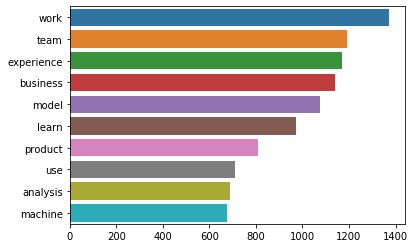

In [80]:
import seaborn as sns

sns.barplot(y=top_ten_words, x=top_ten_counts);

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [87]:
tfidf = TfidfVectorizer(lowercase=False, tokenizer=dummy, preprocessor=dummy)

dtm = tfidf.fit_transform(df['description'].tolist())

dtm = pd.DataFrame(data=dtm.todense(), columns=tfidf.get_feature_names())
dtm.head()

,0,02,02115divdivbnjobbbb,030liuldivdivbrndivnmicrosoft,031819divdivdivdiv,032519,041819,06366,1,10,...,zf,zfxe2x80x99s,zheng,zillow,zillows,zonesplilipnability,zoom,zuckerberg,zurich,﻿1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.097871,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.106766,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
dtm.shape

(426, 15736)

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [88]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, algorithm="kd_tree", n_jobs=-1)
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=-1, n_neighbors=5, p=2, radius=1.0)

In [107]:
text = """ I'd like a job where I work on something within science. Rockets or robotics, or technology, something like that """
ideal_job = [text]
query = tfidf.transform(ideal_job)

nn.kneighbors(query.todense())

(array([[1.3673914 , 1.37461933, 1.38270697, 1.39360089, 1.39568507]]),
 array([[273, 307, 390, 148,  79]]))

In [108]:
df['title'][273]

'Data Scientist (HCE)'

In [109]:
print(df['description'][273][0:200])

['bdivpjoin', 'team', 'recognize', 'leadership', 'innovation', 'diversitypnpare', 'leader', 'community', 'look', 'lead', 'application', 'technique', 'new', 'innovative', 'product', 'service', 'offeringsbrnbrnhoneywell', 'international', '40', 'billion', 'diversify', 'fortune', '100', 'leader', '130000', 'employee', '100', 'country', 'world', 'invent', 'manufacture', 'technology', 'address', 'worldxe2x80x99s', 'tough', 'challenge', 'link', 'global', 'macro', 'trend', 'like', 'energy', 'efficiency', 'clean', 'energy', 'generation', 'safety', 'security', 'globalization', 'customer', 'productivity', 'build', 'world', 'thatxe2x80x99s', 'safe', 'secure', 'comfortable', 'energy', 'efficient', 'innovative', 'productivebrnbrnhoneywell', 'aerospace', 'approximately', '40000', 'employee', 'world', '2015', 'revenue', '15', 'billion', 'thousand', 'honeywell', 'aerospace', 'technology', 'product', 'service', 'find', 'virtually', 'commercial', 'defense', 'space', 'aircraft', 'worldwidepndivdivdivdiv2

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 